In [23]:
import pandas as pd
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector

In [24]:
df = pd.read_csv("../utils/SquidGames.csv", sep='\t')
df = df.drop_duplicates()
df = df.reset_index(drop=True)
df['Tweets'].replace(r"\d+ \d+-\d+-\d+ \d+:\d+:\d+ \+\d+","",regex=True,inplace=True)
df["Author"] = df['Tweets'].str.extract(r'^ <(.*?)>')
df['Tweets'].replace(r"^ <(.*?)>","",regex=True,inplace=True)
df['To'] = df['Tweets'].str.extract(r'^ (@.*? )*')
df['Tweets'].replace("^ (@.*? )*","",regex=True,inplace=True)


In [29]:
def get_lang_detector(nlp, name):
    return LanguageDetector()

nlp = spacy.load("en_core_web_sm")
#Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

language = []
score = []

for tweet in df.Tweets:
    doc = nlp(tweet)
    language.append(doc._.language["language"])
    score.append(doc._.language["score"])

df['language'] = language
df['score'] = score

ValueError: Length of values (60326) does not match length of index (500)

In [31]:
df

,Tweets,Author,To,language,score
0,Squid games baru nyampek S2 kah?,brucettha,@laufxys0n,id,0.999998
1,Squid games baru nyampek S2 kah?,brucettha,@moviemenfes,id,0.999998
2,Squid games sama yumi cells🤩,nirrguna,NaN,ca,0.999996
3,Yumi's Cells sama squid games,Vitaliatristin3,@kdrama_menfess,ca,0.999995
4,"Enderman , Steve Human, and Squid games for ...",jason28_hongfu,NaN,en,0.999995
...,...,...,...,...,...
60321,"Squid Games dekha Aaj pura ka pura,Kasam se Ek...",DesiGamers01,NaN,id,0.857138
60322,I just watched ep 6 of squid games ...,KanishkaPal8,@mochibomb07,en,0.999997
60323,"After watching #squidgamenetflix last night, I...",EmilioCot,NaN,en,0.999996
60324,Man I told someone to watch squid games and th...,_ETNOM,NaN,en,0.999998


In [33]:
df = df[df.language == 'en']

In [35]:
nlp = spacy.load("en_core_web_sm")

tokens = []
lemma = []
pos = []

for doc in nlp.pipe(df['Tweets'].astype('unicode').values, batch_size=50):
    if doc.is_parsed:
        tokens.append([n.text for n in doc])
        lemma.append([n.lemma_ for n in doc])
        pos.append([n.pos_ for n in doc])
    else:
        # We want to make sure that the lists of parsed results have the
        # same number of entries of the original Dataframe, so add some blanks in case the parse fails
        tokens.append(None)
        lemma.append(None)
        pos.append(None)

df['Tweets_tokens'] = tokens
df['Tweets_lemma'] = lemma
df['Tweets_pos'] = pos

C:\Users\bily6\AppData\Local\Temp/ipykernel_16096/3628704015.py:8: DeprecationWarning: [W107] The property `Doc.is_parsed` is deprecated. Use `Doc.has_annotation("DEP")` instead.
  if doc.is_parsed:
C:\Users\bily6\AppData\Local\Temp/ipykernel_16096/3628704015.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweets_tokens'] = tokens
C:\Users\bily6\AppData\Local\Temp/ipykernel_16096/3628704015.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Tweets_lemma'] = lemma
C:\Users\bily6\AppData\Local\

In [72]:
df.shape

(46814, 8)

In [71]:
df.to_csv("../utils/SquidGames_prepross.csv")

In [65]:
df_copy = df.copy()

In [68]:
df_copy.drop_duplicates(subset=['Tweets'])

,Tweets,Author,To,language,score,Tweets_tokens,Tweets_lemma,Tweets_pos
4,"Enderman , Steve Human, and Squid games for ...",jason28_hongfu,NaN,en,0.999995,"[Enderman, ,, , Steve, Human, ,, , and, Squi...","[Enderman, ,, , Steve, Human, ,, , and, Squi...","[PROPN, PUNCT, SPACE, PROPN, PROPN, PUNCT, SPA..."
6,anyway he will be in squid games!!!!! aaaaa ca...,smolgyuboo,NaN,en,0.999997,"[anyway, he, will, be, in, squid, games, !, !,...","[anyway, he, will, be, in, squid, game, !, !, ...","[INTJ, PRON, AUX, VERB, ADP, ADJ, NOUN, PUNCT,..."
7,pls squid games this friday but class starts t...,pogihajimaedits,NaN,en,0.999996,"[pls, squid, games, this, friday, but, class, ...","[pls, squid, game, this, friday, but, class, s...","[INTJ, ADJ, NOUN, DET, PROPN, CCONJ, NOUN, VER..."
8,squid games and sex ed will be released this f...,whipped4huasen,NaN,en,0.999997,"[squid, games, and, sex, ed, will, be, release...","[squid, game, and, sex, ed, will, be, release,...","[ADJ, NOUN, CCONJ, NOUN, NOUN, AUX, AUX, VERB,..."
9,"Awh man, i thought squid games was coming out ...",ainaxamiruddin,NaN,en,0.999996,"[Awh, man, ,, i, thought, squid, games, was, c...","[awh, man, ,, I, think, squid, game, be, come,...","[NOUN, NOUN, PUNCT, PRON, VERB, ADJ, NOUN, AUX..."
...,...,...,...,...,...,...,...,...
60320,deok-su when he had to partner with mi-nyeo fo...,giannidior,NaN,en,0.999998,"[deok, -, su, when, he, had, to, partner, with...","[deok, -, su, when, he, have, to, partner, wit...","[NOUN, PUNCT, PROPN, ADV, PRON, VERB, PART, VE..."
60322,I just watched ep 6 of squid games ...,KanishkaPal8,@mochibomb07,en,0.999997,"[I, just, watched, ep, 6, of, squid, games, ...]","[I, just, watch, ep, 6, of, squid, game, ...]","[PRON, ADV, VERB, PROPN, NUM, ADP, ADJ, NOUN, ..."
60323,"After watching #squidgamenetflix last night, I...",EmilioCot,NaN,en,0.999996,"[After, watching, #, squidgamenetflix, last, n...","[after, watch, #, squidgamenetflix, last, nigh...","[ADP, VERB, DET, ADJ, ADJ, NOUN, PUNCT, PRON, ..."
60324,Man I told someone to watch squid games and th...,_ETNOM,NaN,en,0.999998,"[Man, I, told, someone, to, watch, squid, game...","[man, I, tell, someone, to, watch, squid, game...","[INTJ, PRON, VERB, PRON, PART, VERB, ADJ, NOUN..."


In [53]:
import nltk
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns
import wordcloud
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import os

color = sns.color_palette()

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
words = []
for review in df.Tweets_lemma:
    for word in review:
        words.append(word)
textt = " ".join(words)




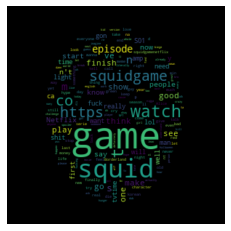

In [60]:
mask = np.array(Image.open("product-image-1856313566-300x300.jpg"))
wordcloud = WordCloud(mask=mask,width=1600,height=800,stopwords=stopwords,collocations=False).generate(textt)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('../utils/wordcloud.png', dpi=720, )
plt.show()

In [70]:
import pickle
model = pickle.load(open('../model/model_v1','rb'))

AttributeError: Can't get attribute 'text_processing' on <module '__main__'>

In [ ]:
change_path = "nodes/hellofolder"
print(os.chdir(change_path)
